In [10]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering


In [11]:
data_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
data_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'    
os.listdir(folder)

img_predictions_data = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Hide these keys before publishing or sharing notebook.**

In [13]:
key = "XXXX"
key_secret = "XXXX"
token = "XXXX"
token_secret = "XXXX"

auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth)

In [14]:
tweet_ids = list(data_twitter_archive.tweet_id)

In [15]:
tweet_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

#opening the file


In [16]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
data_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    data_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_data = pd.DataFrame(data_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_data.head()

,tweet_id,retweets,favorites
0,892420643555336193,8831,39442
1,892177421306343426,6470,33747
2,891815181378084864,4291,25418
3,891689557279858688,8907,42806
4,891327558926688256,9690,40946


# Assessment
on three data frames:
 `tweets_data`
 `img_predictions_data`
 `archve_df` 

In [17]:
#getting details for all the data frames
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id     2351 non-null object
retweets     2351 non-null int64
favorites    2351 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [18]:
img_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
data_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
img_predictions_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
data_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
tweets_data.describe()

,retweets,favorites
count,2351.000000,2351.000000
mean,3131.396852,8111.893662
std,5238.522870,11989.498195
min,0.000000,0.000000
25%,617.000000,1419.000000
50%,1453.000000,3594.000000
75%,3622.500000,10115.500000
max,79007.000000,132170.000000


In [23]:
#checking for dupicates
columns_all = pd.Series(list(tweets_data) + list(data_twitter_archive) + list(img_predictions_data))
columns_all[columns_all.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [24]:
data_twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [25]:
data_twitter_archive[data_twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
data_twitter_archive[data_twitter_archive.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


## Problems



1. missing data for tweets
2. missing img predictions for some tweets

(The missing data for the tweets cannot be recovered.)

We have to merge all the three tables.

We have to change the data types of the columns according to our convinence for better analysis.


In [27]:
#cleaning process
archive_clean_data =data_twitter_archive.copy()
tweets_clean = tweets_data.copy()
img_pred_clean = img_predictions_data.copy()

In [28]:
tweets_clean.head()

,tweet_id,retweets,favorites
0,892420643555336193,8831,39442
1,892177421306343426,6470,33747
2,891815181378084864,4291,25418
3,891689557279858688,8907,42806
4,891327558926688256,9690,40946


In [29]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:

archive_clean_data.tweet_id = archive_clean_data.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)
archive_clean_data = pd.merge(archive_clean_data, tweets_clean,
                        how = 'inner', on = 'tweet_id')
archive_clean_data = pd.merge(archive_clean_data, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

**Test**

In [31]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 30 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2072 non-null object
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           78 non-null float64
retweeted_status_user_id      78 non-null float64
retweeted_status_timestamp    78 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
doggo                         2072 non-null object
floofer                       2072 non-null object
pupper                        2072 non-null object
puppo                         2072 non-null object
retweets                      2072

In [32]:
archive_clean_data.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1669,673697980713705472,NaN,NaN,2015-12-07 02:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673697980...,...,1,porcupine,0.151876,False,hen,0.111380,False,doormat,0.058934,False
1335,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,...,1,fiddler_crab,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False
804,749403093750648834,NaN,NaN,2016-07-03 00:43:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Duuun dun... duuun dun... dunn dun. dunn dun....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749403093...,...,1,Chesapeake_Bay_retriever,0.694541,True,curly-coated_retriever,0.076335,True,Irish_water_spaniel,0.048550,True


In [33]:
archive_clean_data[archive_clean_data.retweets.isnull()]
#sum(archive_clean_data.retweets.isnull())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define:** Retweeted records in the dataset: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

**Code:**  I deleted the retweeted tweets. I queried the records where the retweeted status was not null and dropped the values. I also dropped the unecessary retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.

In [34]:
archive_clean_data = pd.melt(archive_clean_data,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'],
                        value_name='dog_stage')
archive_clean_data = archive_clean_data.drop('variable', axis=1)

**Test**

In [35]:
archive_clean_data.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
740,757611664640446465,NaN,NaN,2016-07-25 16:21:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757611664...,...,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True,None
4951,749064354620928000,NaN,NaN,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749064354...,...,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True,None
6433,841314665196081154,NaN,NaN,2017-03-13 15:47:01 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841314665...,...,Afghan_hound,0.903712,True,Saluki,0.035215,True,bloodhound,0.026565,True,None


In [36]:
len(archive_clean_data[archive_clean_data.dog_stage != 'None'])

334

In [37]:
archive_clean_data.dog_stage.value_counts()

None       7954
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [38]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 27 columns):
tweet_id                      8288 non-null object
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8288 non-null object
source                        8288 non-null object
text                          8288 non-null object
retweeted_status_id           312 non-null float64
retweeted_status_user_id      312 non-null float64
retweeted_status_timestamp    312 non-null object
expanded_urls                 8288 non-null object
rating_numerator              8288 non-null int64
rating_denominator            8288 non-null int64
name                          8288 non-null object
retweets                      8288 non-null int64
favorites                     8288 non-null int64
jpg_url                       8288 non-null object
img_num                       8288 non-null int64
p1                            8288

In [39]:
# Keep one of 3 duplicates with 'None'
data_dup1 = archive_clean_data.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
data_dup1 = archive_clean_data.drop_duplicates()

# Keep rows with dog stage
dup_pos = archive_clean_data.duplicated(subset='tweet_id', keep = False)
data_dup2 = archive_clean_data[dup_pos]
data_dup2 = data_dup2[data_dup2.dog_stage != 'None']

# Combine
data_dup1 = data_dup1.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = data_dup1.append(data_dup2)

In [40]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2085 non-null object
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           80 non-null float64
retweeted_status_user_id      80 non-null float64
retweeted_status_timestamp    80 non-null object
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null int64
rating_denominator            2085 non-null int64
name                          2085 non-null object
retweets                      2085 non-null int64
favorites                     2085 non-null int64
jpg_url                       2085 non-null object
img_num                       2085 non-null int64
p1                            2085 no

In [41]:
remaining_data_df = dup_df_merged[dup_df_merged.duplicated(subset='tweet_id', keep=False)]
remaining_data_df[remaining_data_df.tweet_id == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
365,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4509,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


**Define:** Duplicate tweets from multiple dog stages.

**Code:** Multiple stages appear in 14 tweets. Change `dog_stage` to _multiple_, drop duplicates. Remove drop duplicates from `archive_clean_data` based on `tweet_id`, then append `multiple` rows.

In [42]:
remaining_data_df.dog_stage = 'multiple'
dup_drops = remaining_data_df.drop_duplicates()
dup_drops[dup_drops.tweet_id == '817777686764523521']

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
365,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,multiple


In [43]:
duped_ids = set(remaining_data_df.tweet_id)
for idx in dup_df_merged.tweet_id:
    if idx in duped_ids:
        dup_df_merged.dog_stage[dup_df_merged.tweet_id == idx] = 'multiple'
archive_clean_data = dup_df_merged.drop_duplicates()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Test**

In [44]:
archive_clean_data.dog_stage.value_counts()

None        1751
pupper       211
doggo         67
puppo         23
multiple      13
floofer        7
Name: dog_stage, dtype: int64

In [45]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2072 non-null object
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           78 non-null float64
retweeted_status_user_id      78 non-null float64
retweeted_status_timestamp    78 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
retweets                      2072 non-null int64
favorites                     2072 non-null int64
jpg_url                       2072 non-null object
img_num                       2072 non-null int64
p1                            2072 no

### Validity

**Define:** Convert float variables (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`) to object.

**Code:** Convert tweet_id to string

In [46]:
archive_clean_data.in_reply_to_status_id = archive_clean_data.in_reply_to_status_id.astype(str)
archive_clean_data.in_reply_to_user_id = archive_clean_data.in_reply_to_user_id.astype(str)
archive_clean_data.retweeted_status_id = archive_clean_data.retweeted_status_id.astype(str)
archive_clean_data.retweeted_status_user_id = archive_clean_data.retweeted_status_user_id.astype(str)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [47]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         2072 non-null object
in_reply_to_user_id           2072 non-null object
timestamp                     2072 non-null object
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           2072 non-null object
retweeted_status_user_id      2072 non-null object
retweeted_status_timestamp    78 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
retweets                      2072 non-null int64
favorites                     2072 non-null int64
jpg_url                       2072 non-null object
img_num                       2072 non-null int64
p1                            207

**Define:** Convert object variables (`timestamp` and `retweeted_status_timestamp`) to datetime.

**Code:** Convert timestamp to datetime object.

In [48]:
archive_clean_data.timestamp = pd.to_datetime(archive_clean_data.timestamp)
archive_clean_data.retweeted_status_timestamp = pd.to_datetime(archive_clean_data.retweeted_status_timestamp)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [49]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         2072 non-null object
in_reply_to_user_id           2072 non-null object
timestamp                     2072 non-null datetime64[ns]
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           2072 non-null object
retweeted_status_user_id      2072 non-null object
retweeted_status_timestamp    78 non-null datetime64[ns]
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
retweets                      2072 non-null int64
favorites                     2072 non-null int64
jpg_url                       2072 non-null object
img_num                       2072 non-null int64
p1               

In [50]:
archive_clean_data.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
799,750011400160841729,nan,nan,2016-07-04 17:00:26,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,nan,nan,NaT,https://twitter.com/dog_rates/status/750011400...,...,muzzle,0.23762,False,Boston_bull,0.08715,True,sombrero,0.06851,False,doggo


**Define:** dog categories are str (`data_twitter_archive`)

**Code:** convert `dog_stage` to categorical type

In [51]:
archive_clean_data.dog_stage = archive_clean_data.dog_stage.astype('category')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [52]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         2072 non-null object
in_reply_to_user_id           2072 non-null object
timestamp                     2072 non-null datetime64[ns]
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           2072 non-null object
retweeted_status_user_id      2072 non-null object
retweeted_status_timestamp    78 non-null datetime64[ns]
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
retweets                      2072 non-null int64
favorites                     2072 non-null int64
jpg_url                       2072 non-null object
img_num                       2072 non-null int64
p1               

**Define:** retweets and favorites are float

**Code:** Fill NaNs with median values.

In [53]:
median_retweet = np.median(archive_clean_data.retweets.dropna())
median_favorite = np.median(archive_clean_data.favorites.dropna())
print(median_retweet, median_favorite)

1397.0 3845.0


In [54]:
archive_clean_data.retweets = archive_clean_data.retweets.fillna(median_retweet).astype('int64')
archive_clean_data.favorites = archive_clean_data.favorites.fillna(median_favorite).astype('int64')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [55]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7104
Data columns (total 27 columns):
tweet_id                      2072 non-null object
in_reply_to_status_id         2072 non-null object
in_reply_to_user_id           2072 non-null object
timestamp                     2072 non-null datetime64[ns]
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           2072 non-null object
retweeted_status_user_id      2072 non-null object
retweeted_status_timestamp    78 non-null datetime64[ns]
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
retweets                      2072 non-null int64
favorites                     2072 non-null int64
jpg_url                       2072 non-null object
img_num                       2072 non-null int64
p1               

**Define:** names incorrectly identified from available text

**Code:** replace words with names where available

In [56]:
archive_clean_data.text[archive_clean_data.name =='a']
archive_clean_data.text[archive_clean_data.name =='an']
archive_clean_data.text[archive_clean_data.name =='my']
archive_clean_data.text[archive_clean_data.name =='his']

813    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [57]:
archive_clean_data.name[2204] = 'Berta'
archive_clean_data.name[2034] = 'Jacob'
archive_clean_data.name[2066] = 'Rufus'
archive_clean_data.name[2116] = 'Spork'
archive_clean_data.name[2125] = 'Cherokee'
archive_clean_data.name[2161] = 'Alfredo'
archive_clean_data.name[2218] = 'Chuk'
archive_clean_data.name[2235] = 'Alfonso'
archive_clean_data.name[2249] = 'Cheryl'
archive_clean_data.name[2255] = 'Jessiga'
archive_clean_data.name[2264] = 'Klint'
archive_clean_data.name[2273] = 'Kohl'
archive_clean_data.name[2304] = 'Pepe'
archive_clean_data.name[2311] = 'Octaviath'
archive_clean_data.name[archive_clean_data.name == 'my'] = 'Zoey'
archive_clean_data.name[archive_clean_data.name == 'his'] = 'Quizno'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6

**Test**

In [58]:
archive_clean_data.loc[archive_clean_data.name == 'Berta']
archive_clean_data.loc[archive_clean_data.name == 'Jacob']
archive_clean_data.loc[archive_clean_data.name == 'Rufus']
archive_clean_data.loc[archive_clean_data.name == 'Spork']
archive_clean_data.loc[archive_clean_data.name == 'Cherokee']
archive_clean_data.loc[archive_clean_data.name == 'Alfredo']
archive_clean_data.loc[archive_clean_data.name == 'Chuk']
archive_clean_data.loc[archive_clean_data.name == 'Alfonso']
archive_clean_data.loc[archive_clean_data.name == 'Cheryl']
archive_clean_data.loc[archive_clean_data.name == 'Jessiga']
archive_clean_data.loc[archive_clean_data.name == 'Klint']
archive_clean_data.loc[archive_clean_data.name == 'Kohl']
archive_clean_data.loc[archive_clean_data.name == 'Pepe']
archive_clean_data.loc[archive_clean_data.name == 'Octaviath']
archive_clean_data.loc[archive_clean_data.name == 'Zoey']
archive_clean_data.loc[archive_clean_data.name == 'Quizno']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
813,748692773788876800,nan,nan,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,nan,nan,NaT,https://twitter.com/dog_rates/status/748692773...,...,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False,doggo



**Define:** incorrect dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such) (`data_twitter_archive`)

**Code:** Replace "a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such" with "None".

In [59]:
non_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

for name in archive_clean_data.name:
    if name in non_names:
        archive_clean_data.name[archive_clean_data.name == name] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:7624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


**Test**

In [60]:
archive_clean_data.name.value_counts()[:10]

None       669
Charlie     11
Tucker      10
Cooper      10
Penny       10
Lucy        10
Oliver      10
Bo           8
Lola         8
Sadie        8
Name: name, dtype: int64

**Define:** meaningful but inconsistent numerators and denominators (`data_twitter_archive`)

In [61]:
archive_clean_data.rating_denominator.value_counts()

10     2054
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

While these numerators and denominators have strange values, the reason for that is for humor. These are intentional, not errors. I will leave them as they are.

# Store

In [62]:
archive_clean_data.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analysis

What does the relationship between retweets and favorites look like? 5 tweets had missing values for retweets and favorites, so I filled those in with median values for their respective variables.

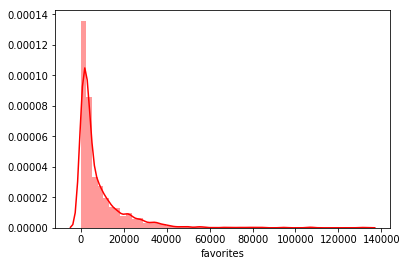

In [63]:
sns.distplot(archive_clean_data.favorites, color = 'red', label = 'Favorite tweet')



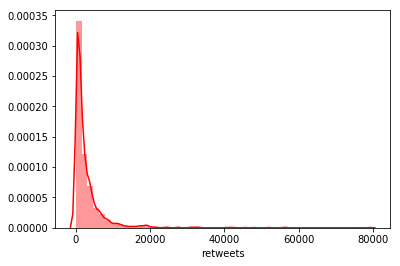

In [64]:
sns.distplot(archive_clean_data.retweets, color = 'red', label = 'Retweets')


In [65]:
favorities_lognormed = archive_clean_data.favorites[archive_clean_data.favorites <= 0] = 1
retweets_lognormed = archive_clean_data.retweets[archive_clean_data.retweets <= 0] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:7624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/li

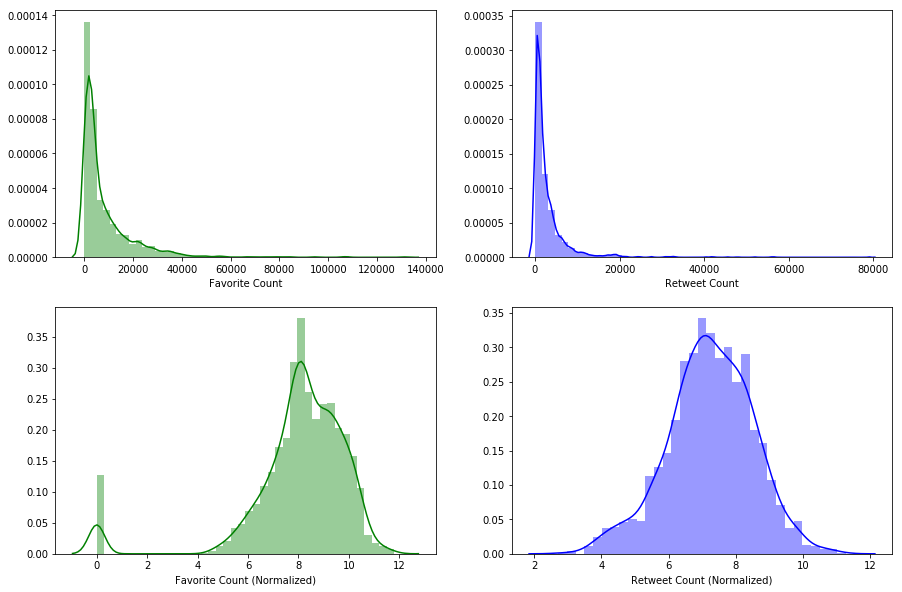

In [66]:
f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)

sns.distplot(archive_clean_data.favorites, color = 'green', ax=axes[0,0], axlabel='Favorite Count')
sns.distplot(archive_clean_data.retweets, color = 'blue', ax=axes[0,1], axlabel='Retweet Count')
sns.distplot(archive_clean_data.favorites.apply(np.log), color = 'green', ax=axes[1,0], axlabel='Favorite Count (Normalized)')
sns.distplot(archive_clean_data.retweets.apply(np.log), color = 'blue', ax=axes[1,1], axlabel='Retweet Count (Normalized)')

f.savefig('distplots.png')

In [67]:
archive_clean_data.retweets.describe()

count     2072.000000
mean      2954.323359
std       5023.939243
min         15.000000
25%        629.500000
50%       1397.000000
75%       3412.750000
max      79007.000000
Name: retweets, dtype: float64

In [68]:
archive_clean_data.favorites.describe()

count      2072.000000
mean       8581.796332
std       12276.467375
min           1.000000
25%        1664.750000
50%        3845.000000
75%       10900.750000
max      132170.000000
Name: favorites, dtype: float64

In [69]:
archive_clean_data.corr()

,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.198243,0.017732,0.017004,-0.000413,-0.009139,-0.028503,-0.020319,-0.033727,-0.003883,-0.028490
rating_denominator,0.198243,1.000000,-0.022023,-0.026125,-0.004019,-0.004315,0.001000,-0.034415,-0.000498,0.006795,0.005093
retweets,0.017732,-0.022023,1.000000,0.807229,0.103595,0.045409,0.009853,-0.009730,0.023464,-0.032916,0.003039
favorites,0.017004,-0.026125,0.807229,1.000000,0.133685,0.071968,0.052865,-0.020363,0.059625,-0.050239,0.042533
img_num,-0.000413,-0.004019,0.103595,0.133685,1.000000,0.203967,0.027623,-0.160172,0.047263,-0.139320,0.059533
p1_conf,-0.009139,-0.004315,0.045409,0.071968,0.203967,1.000000,0.118523,-0.510987,0.131717,-0.709681,0.109616
p1_dog,-0.028503,0.001000,0.009853,0.052865,0.027623,0.118523,1.000000,0.113482,0.634600,0.048815,0.557212
p2_conf,-0.020319,-0.034415,-0.009730,-0.020363,-0.160172,-0.510987,0.113482,1.000000,0.101829,0.479124,0.067830
p2_dog,-0.033727,-0.000498,0.023464,0.059625,0.047263,0.131717,0.634600,0.101829,1.000000,0.042871,0.551653
p3_conf,-0.003883,0.006795,-0.032916,-0.050239,-0.139320,-0.709681,0.048815,0.479124,0.042871,1.000000,0.042049


There is a strong relationship between Retweet and Favorite counts (0.72).